In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import random
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


dataset = pd.read_csv('KFT Dataset_modified.csv')

In [2]:
#데이터 정보 확인
# Display general information about the dataset
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Menu                       136 non-null    object
 1   Category                   136 non-null    object
 2   Base Type                  136 non-null    object
 3   Flavor Tags                136 non-null    object
 4   Customizable Sweetness     136 non-null    object
 5   Available Sweetness Level  136 non-null    object
 6   Allergens                  136 non-null    object
 7   Contains Caffeine          136 non-null    object
 8   Contains Gluten            136 non-null    object
 9   Oat Milk Substitution      136 non-null    object
 10  Vegan-friendly             136 non-null    object
 11  Contains dairy             136 non-null    object
dtypes: object(12)
memory usage: 12.9+ KB


In [3]:
# 결측치 확인
# Check for missing values in each column
print("Missing Values:")
print(dataset.isnull().sum())


Missing Values:
Menu                         0
Category                     0
Base Type                    0
Flavor Tags                  0
Customizable Sweetness       0
Available Sweetness Level    0
Allergens                    0
Contains Caffeine            0
Contains Gluten              0
Oat Milk Substitution        0
Vegan-friendly               0
Contains dairy               0
dtype: int64


In [4]:
# 기술 통계
# Display summary statistics for numeric columns
print("Summary Statistics:")
print(dataset.describe(include='all'))

Summary Statistics:
                     Menu Category Base Type     Flavor Tags  \
count                 136      136       136             136   
unique                136        8        18              95   
top     Kung Fu Black Tea    Slush     Water  Creamy, Normal   
freq                    1       30        35               8   

       Customizable Sweetness Available Sweetness Level Allergens  \
count                     136                       136       136   
unique                      2                         8         2   
top                       Yes   0, 30, 50, 70, 100, 120        No   
freq                      127                        80       132   

       Contains Caffeine Contains Gluten Oat Milk Substitution Vegan-friendly  \
count                136             136                   136            136   
unique                 2               2                     2              2   
top                  Yes              No                    No        

In [5]:
## 고유값 확인
# Display the number of unique values for selected categorical columns
print("Unique Values in Categorical Columns:")
for col in ['Menu', 'Category', 'Base Type', 'Flavor Tags']:
    print(f"{col}: {dataset[col].nunique()} unique values")

Unique Values in Categorical Columns:
Menu: 136 unique values
Category: 8 unique values
Base Type: 18 unique values
Flavor Tags: 95 unique values


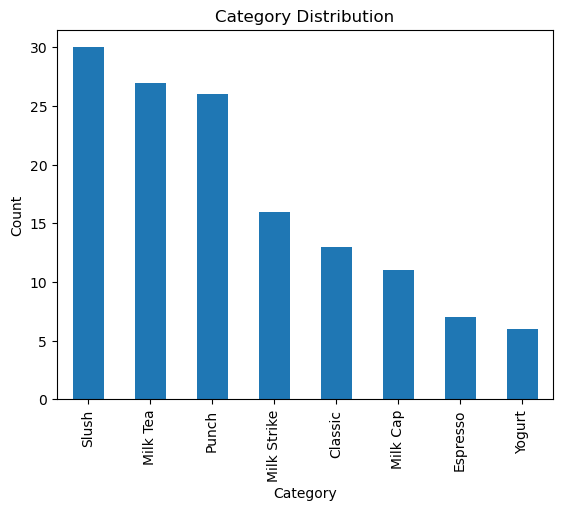

In [6]:
# 음료 카테고리 분포
# Plot the distribution of beverage categories
category_counts = dataset['Category'].value_counts()
category_counts.plot(kind='bar', title='Category Distribution', xlabel='Category', ylabel='Count')
plt.show()

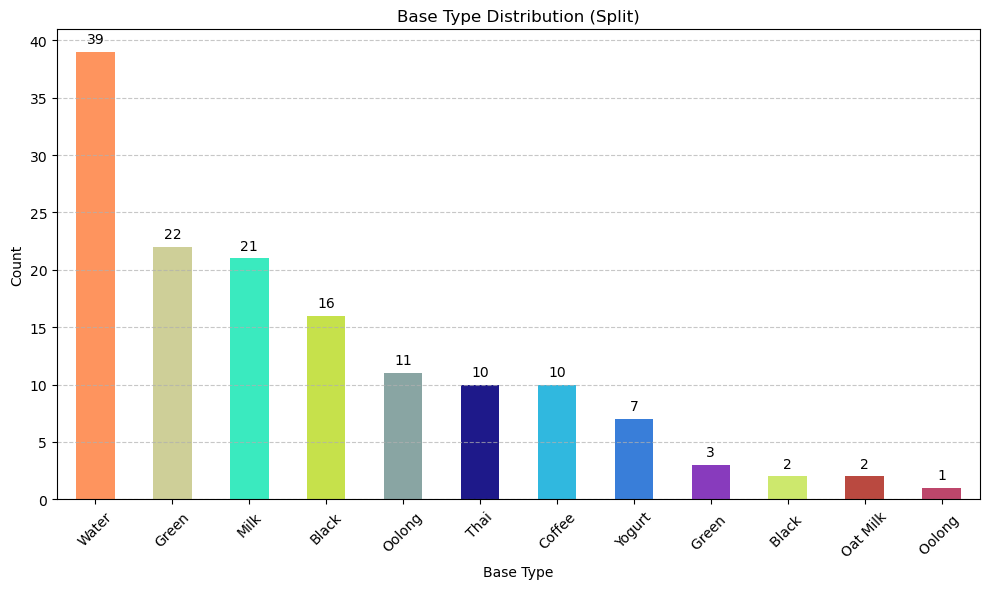

In [7]:
# Split the 'Base Type' values and flatten the list
base_type_split = dataset['Base Type'].dropna().str.split(', ').sum()

# Count the occurrences of each base type
base_type_counts = Counter(base_type_split)

# Convert the counts to a DataFrame for easier handling (optional)
base_type_counts_df = pd.DataFrame.from_dict(base_type_counts, orient='index', columns=['Count'])

# Sort the counts for better visualization
base_type_counts_df = base_type_counts_df.sort_values(by='Count', ascending=False)

# Plot the distribution with random colors
random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(len(base_type_counts))]
ax = base_type_counts_df['Count'].plot(
    kind='bar',
    color=random_colors,
    title='Base Type Distribution (Split)',
    figsize=(10, 6),
    xlabel='Base Type',
    ylabel='Count'
)

# Add the count numbers on top of each bar
for i, count in enumerate(base_type_counts_df['Count']):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Add gridlines and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()

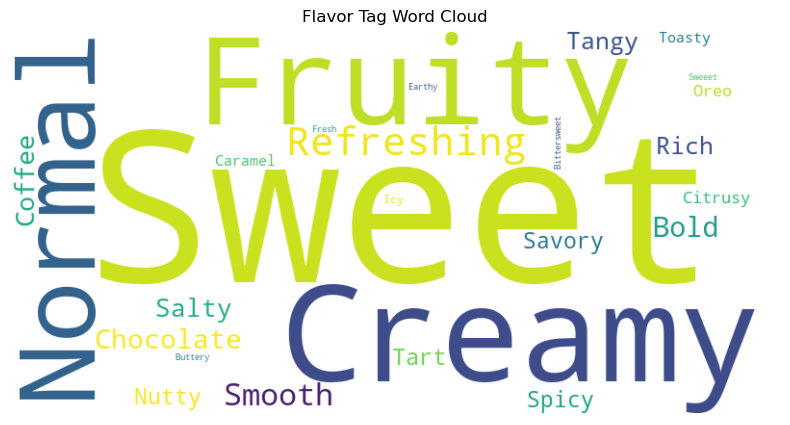

In [8]:
# 맛 태그 분석
# Analyze the frequency of flavor tags

# Flatten all flavor tags into a single list
flavor_tags = dataset['Flavor Tags'].dropna().str.split(', ').sum()
flavor_tag_counts = Counter(flavor_tags)

# Generate a word cloud for flavor tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(flavor_tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Flavor Tag Word Cloud')
plt.show()

/var/folders/d5/v0w7v20x70z55jvhywdpp06h0000gn/T/ipykernel_27755/729037603.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flavor_df['Count'], y=flavor_df.index, palette='coolwarm')


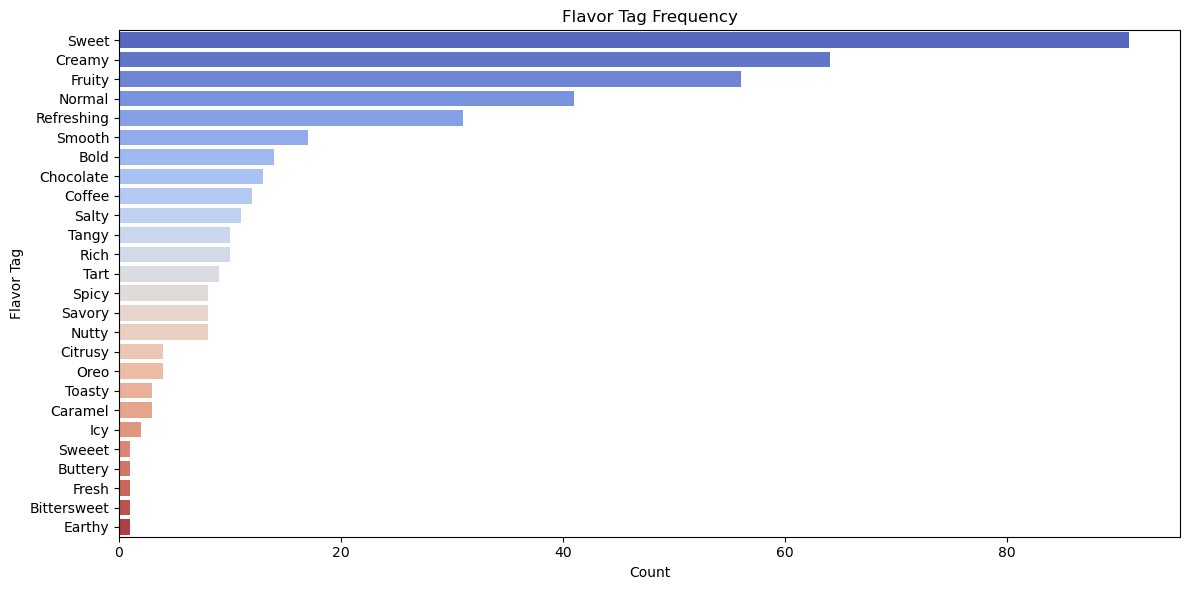

In [9]:
# Flavor Tag Frequency 
flavor_tags = dataset['Flavor Tags'].dropna().str.split(', ').sum()
flavor_tag_counts = Counter(flavor_tags)

flavor_df = pd.DataFrame.from_dict(flavor_tag_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=flavor_df['Count'], y=flavor_df.index, palette='coolwarm')
plt.title('Flavor Tag Frequency')
plt.xlabel('Count')
plt.ylabel('Flavor Tag')
plt.tight_layout()
plt.show()


Customizable Sweetness Counts:
Customizable Sweetness
Yes    127
No       9
Name: count, dtype: int64


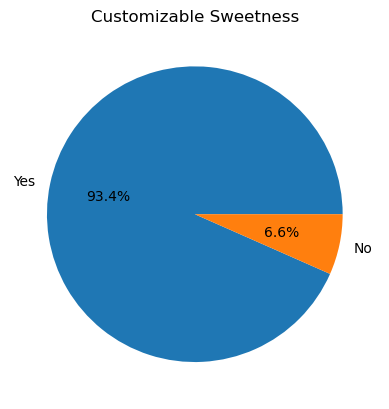

In [10]:
# 당도 조절 가능 여부
# Count the values for customizable sweetness
sweetness_counts = dataset['Customizable Sweetness'].value_counts()
print("Customizable Sweetness Counts:")
print(sweetness_counts)

# Plot the distribution
sweetness_counts.plot(kind='pie', autopct='%1.1f%%', title='Customizable Sweetness')
plt.ylabel('')
plt.show()

Oat Milk Substitution Counts:
Oat Milk Substitution
No     120
Yes     16
Name: count, dtype: int64


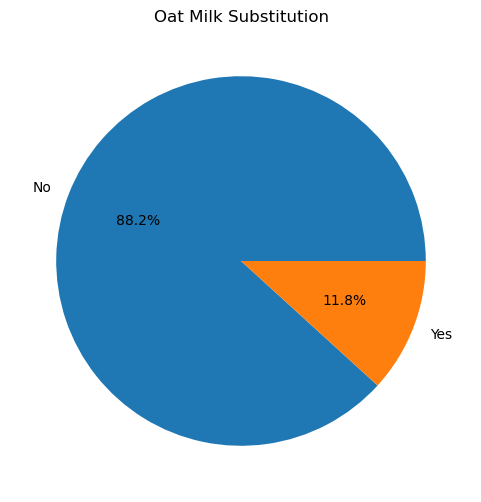

In [11]:
# Oat Milk 대체 가능 여부
# Count the values for oat milk substitution
oat_milk_counts = dataset['Oat Milk Substitution'].value_counts()
print("Oat Milk Substitution Counts:")
print(oat_milk_counts)

# Plot the distribution
oat_milk_counts.plot(kind='pie', autopct='%1.1f%%', title='Oat Milk Substitution', figsize=(6, 6))
plt.ylabel('')
plt.show()


Caffeine Inclusion Counts:
Contains Caffeine
Yes    80
No     56
Name: count, dtype: int64

Gluten Inclusion Counts:
Contains Gluten
No     121
Yes     15
Name: count, dtype: int64


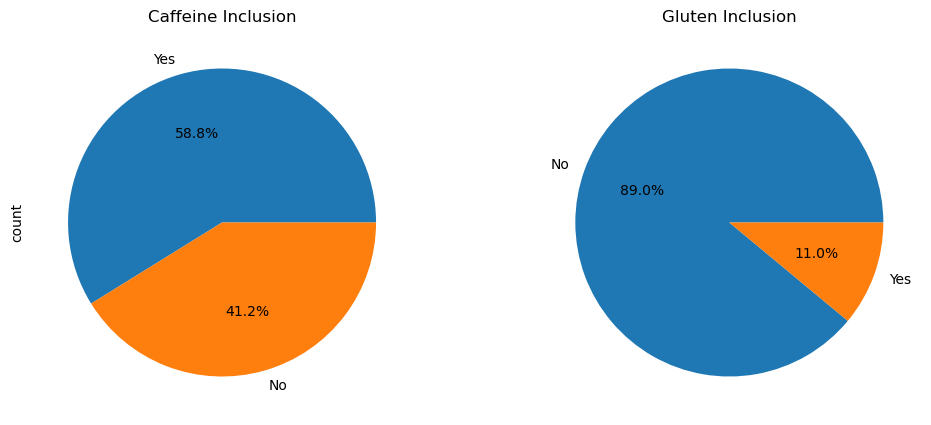

In [12]:
# 카페인 및 글루텐 포함 여부
# Analyze caffeine and gluten inclusion
caffeine_counts = dataset['Contains Caffeine'].value_counts()
gluten_counts = dataset['Contains Gluten'].value_counts()

print("Caffeine Inclusion Counts:")
print(caffeine_counts)
print("\nGluten Inclusion Counts:")
print(gluten_counts)

# Plot the distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
caffeine_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[0], title='Caffeine Inclusion')
gluten_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[1], title='Gluten Inclusion')
plt.ylabel('')
plt.show()

Vegan-Friendly Counts:
Vegan-friendly
No     106
Yes     30
Name: count, dtype: int64


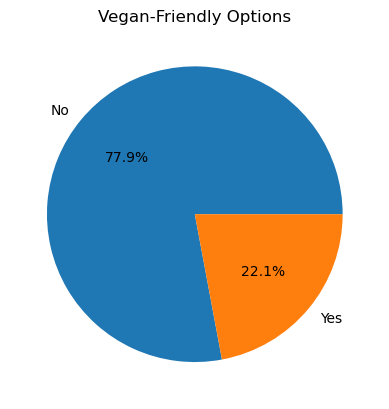

In [13]:
#비건 친화적 음료
# Analyze vegan-friendly options
vegan_counts = dataset['Vegan-friendly'].value_counts()
print("Vegan-Friendly Counts:")
print(vegan_counts)

# Plot the distribution
vegan_counts.plot(kind='pie', autopct='%1.1f%%', title='Vegan-Friendly Options')
plt.ylabel('')
plt.show()

/var/folders/d5/v0w7v20x70z55jvhywdpp06h0000gn/T/ipykernel_27755/713849836.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_combi.values, y=top_combi.index, palette='viridis')


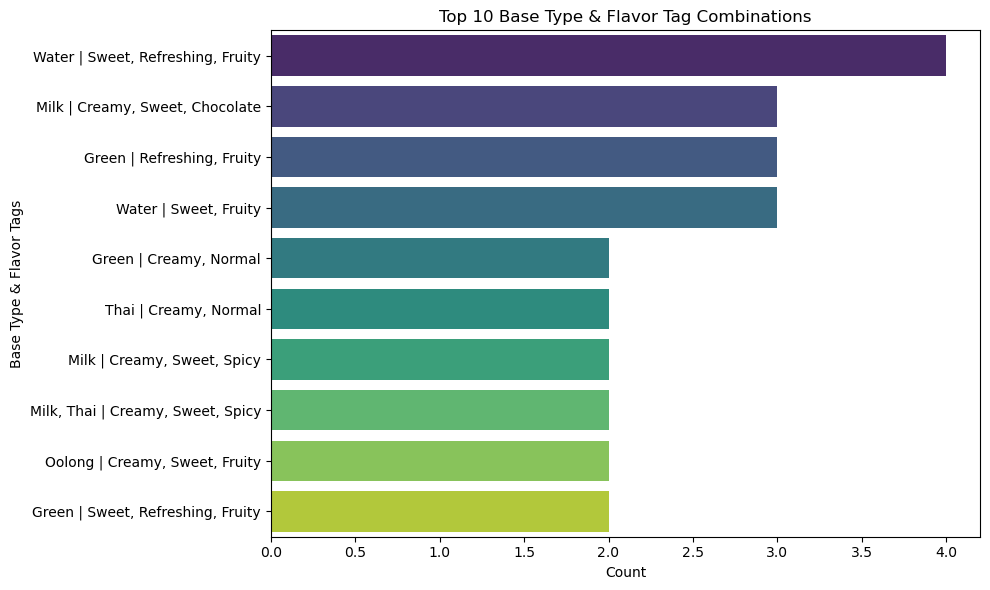

In [14]:
# Base Type & Flavor Tags Paring

# Remove spaces and convert lowercase letters(공백 제거 및 소문자 변환)
dataset.columns = dataset.columns.str.strip().str.lower()

base_flavor_combinations = dataset['base type'] + " | " + dataset['flavor tags']
combination_counts = base_flavor_combinations.value_counts()

# -> Top 10 Most Common Combinations
top_combi = combination_counts.head(10)
#print(top_combi)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_combi.values, y=top_combi.index, palette='viridis')
plt.title('Top 10 Base Type & Flavor Tag Combinations')
plt.xlabel('Count')
plt.ylabel('Base Type & Flavor Tags')
plt.tight_layout()
plt.show()

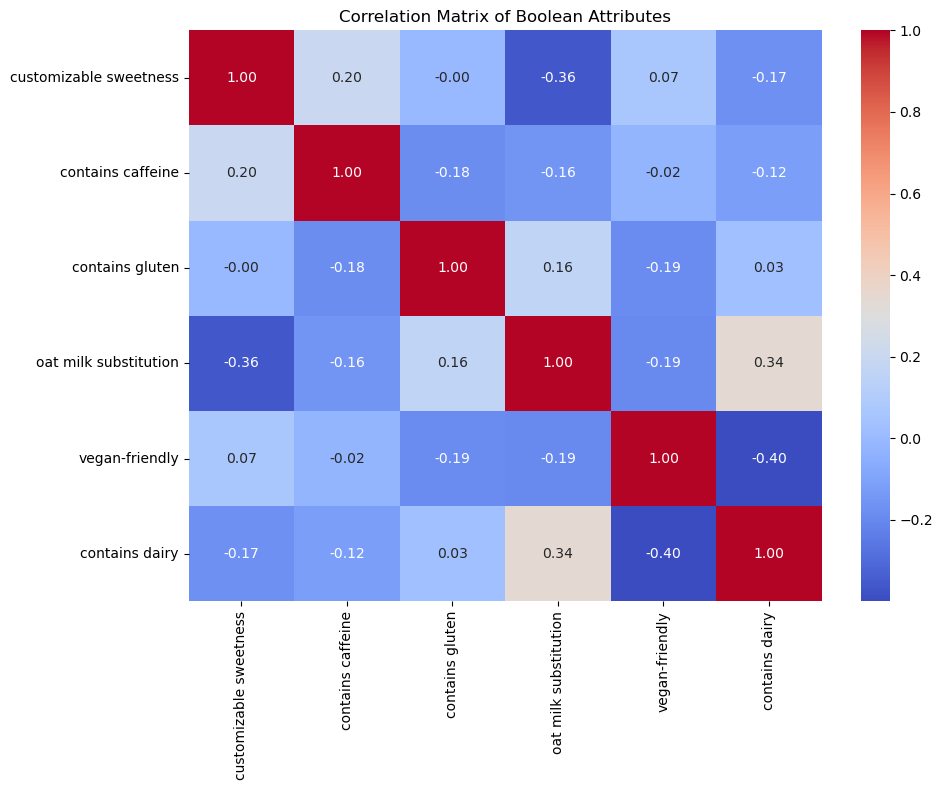

In [15]:
# Beverage attribute correlation(음료 속성 상관관계)
# Encoding Boolean Columns
bool_columns = [
    'customizable sweetness', 
    'contains caffeine', 
    'contains gluten', 
    'oat milk substitution', 
    'vegan-friendly', 
    'contains dairy']
encoded_dataset = dataset.copy()
for col in bool_columns:
    encoded_dataset[col] = encoded_dataset[col].map({'Yes': 1, 'No': 0})

# Heatmap
plt.figure(figsize=(10, 8))
correlation = encoded_dataset[bool_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boolean Attributes')
plt.tight_layout()
plt.show()

Number of VF & ND Drinks: 30


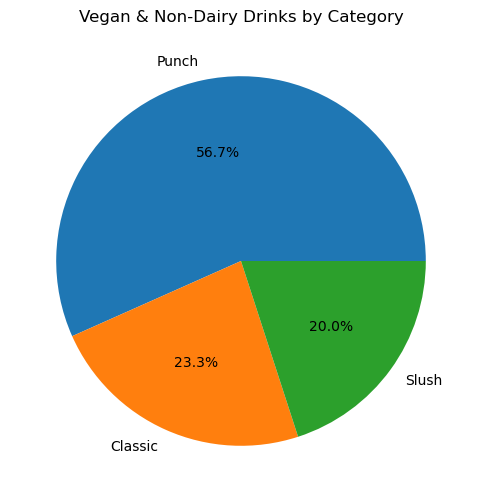

In [16]:
# Vegan-Friendly & Non-Dairy Drinks 음료 비율
filtered_dataset = dataset[(dataset['vegan-friendly'] == 'Yes') & (dataset['contains dairy'] == 'No')]
print(f"Number of VF & ND Drinks: {filtered_dataset.shape[0]}")
plt.figure(figsize=(6, 6))
filtered_dataset['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Vegan & Non-Dairy Drinks by Category')
plt.ylabel('')
plt.show()

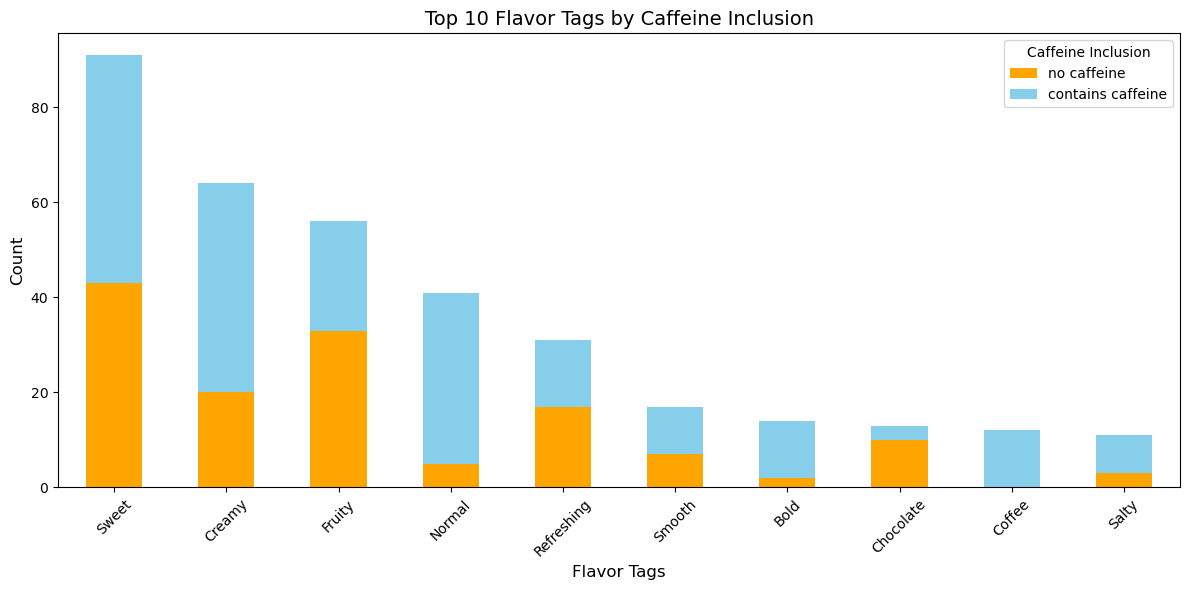

In [17]:
#  카페인 유무에 따른 Flavor Tags
# Flavor Tags by Caffeine Inclusion

# Flavor Tags를 카페인 유무로 그룹화 -> 결합
caffeine_flavor = dataset.groupby('contains caffeine')['flavor tags'].apply(lambda x: ', '.join(x.dropna().str.split(', ').sum()))
caffeine_flavor_counts = caffeine_flavor.str.split(', ').apply(Counter)

# row: Flavor Tags, col: Caffeine Inclusion
caffeine_flavor_df = pd.DataFrame.from_dict(caffeine_flavor_counts.to_dict(), orient='index').fillna(0)
caffeine_flavor_df = caffeine_flavor_df.T 
caffeine_flavor_df.columns = ['no caffeine', 'contains caffeine']  

# 상위 10개 Flavor Tags 
top_flavors = caffeine_flavor_df.sum(axis=1).sort_values(ascending=False).head(10)
caffeine_flavor_df_top = caffeine_flavor_df.loc[top_flavors.index]

caffeine_flavor_df_top.plot(kind='bar',figsize=(12, 6),stacked=True,color=['orange', 'skyblue'] )
plt.title('Top 10 Flavor Tags by Caffeine Inclusion', fontsize=14)
plt.xlabel('Flavor Tags', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Caffeine Inclusion', fontsize=10)
plt.tight_layout()
plt.show()

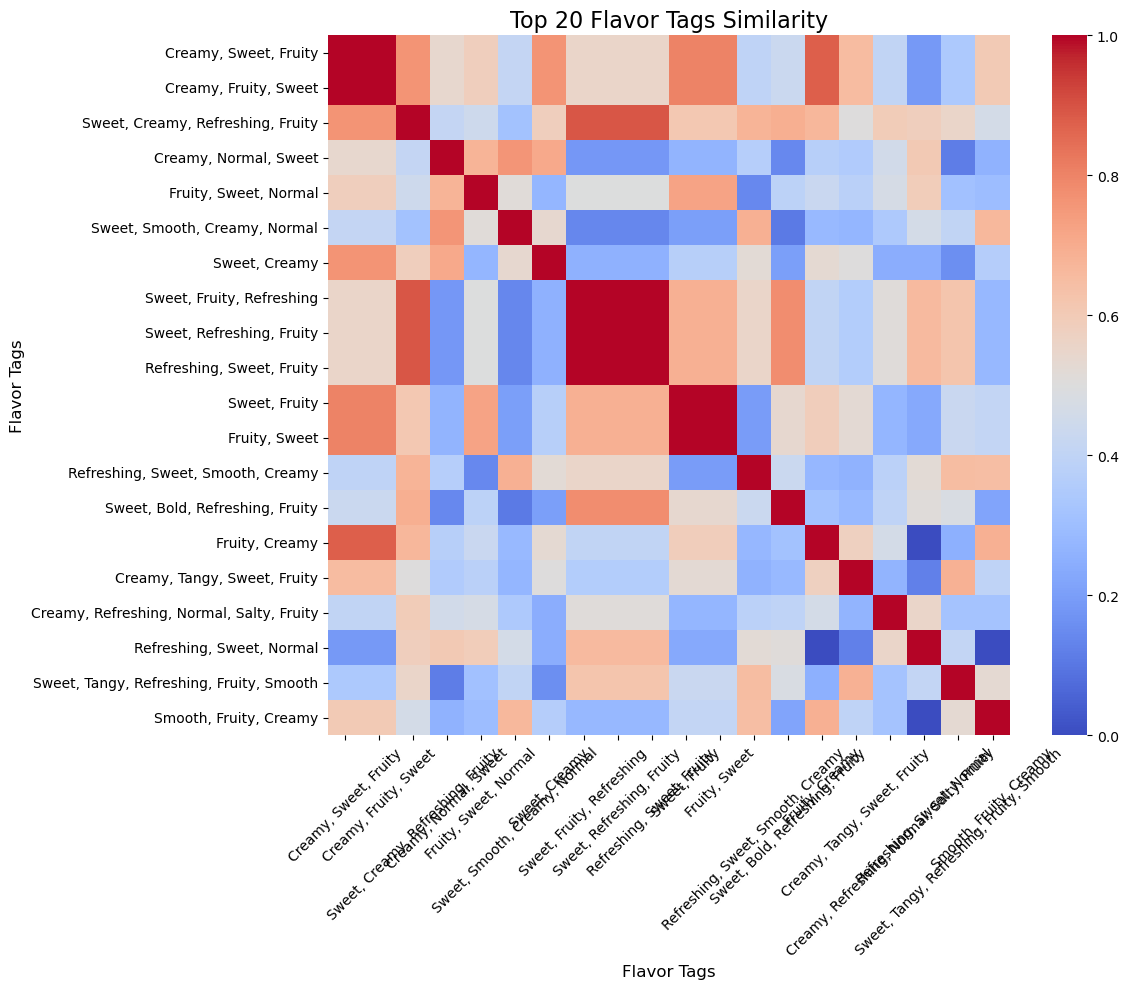

In [18]:
# Flavor Tags top 20
flavor_list = dataset['flavor tags'].dropna().unique()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(flavor_list)
similarity_matrix = cosine_similarity(tfidf_matrix)

top_n = 20
top_flavor_indices = pd.DataFrame(similarity_matrix, index=flavor_list, columns=flavor_list).sum(axis=1).sort_values(ascending=False).head(top_n).index
filtered_similarity_matrix = pd.DataFrame(similarity_matrix, index=flavor_list, columns=flavor_list).loc[top_flavor_indices, top_flavor_indices]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_similarity_matrix, annot=False, cmap='coolwarm', xticklabels=top_flavor_indices, yticklabels=top_flavor_indices)
plt.title('Top {} Flavor Tags Similarity'.format(top_n), fontsize=16)
plt.xlabel('Flavor Tags', fontsize=12)
plt.ylabel('Flavor Tags', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

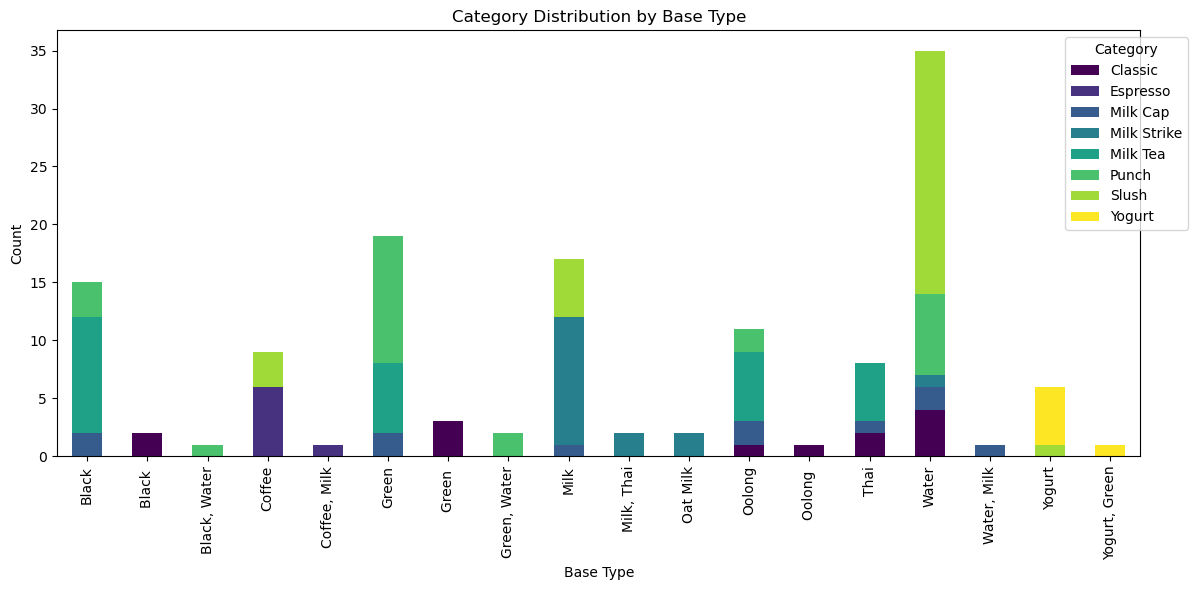

In [19]:
# Category Distribution by Base Type
# Base Type에 따른 Category 분포
base_category_counts = dataset.groupby('base type')['category'].value_counts().unstack().fillna(0)

base_category_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title('Category Distribution by Base Type')
plt.xlabel('Base Type')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

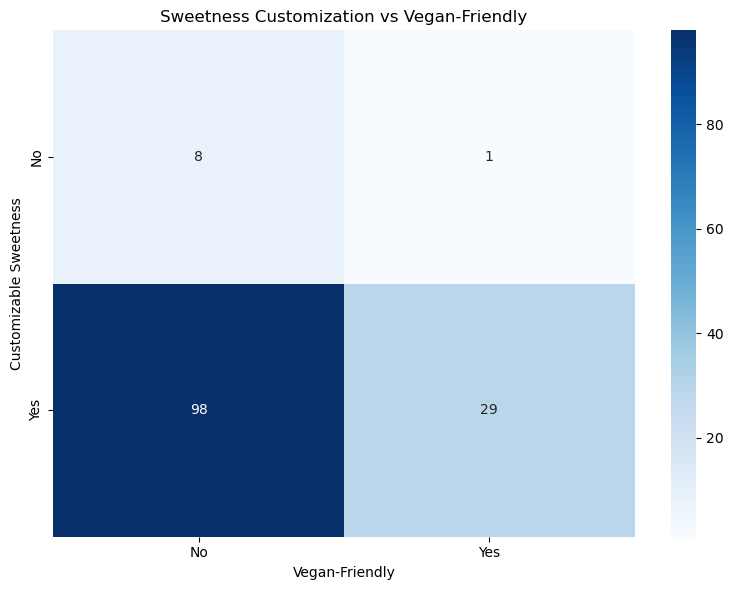

In [20]:
# Sweetness Customization vs Vegan-Friendly
# Sweetness와 Vegan-Friendly 상관관계
sweetness_vegan = pd.crosstab(dataset['customizable sweetness'], dataset['vegan-friendly'])

plt.figure(figsize=(8, 6))
sns.heatmap(sweetness_vegan, annot=True, cmap='Blues', fmt='d')
plt.title('Sweetness Customization vs Vegan-Friendly')
plt.xlabel('Vegan-Friendly')
plt.ylabel('Customizable Sweetness')
plt.tight_layout()
plt.show()


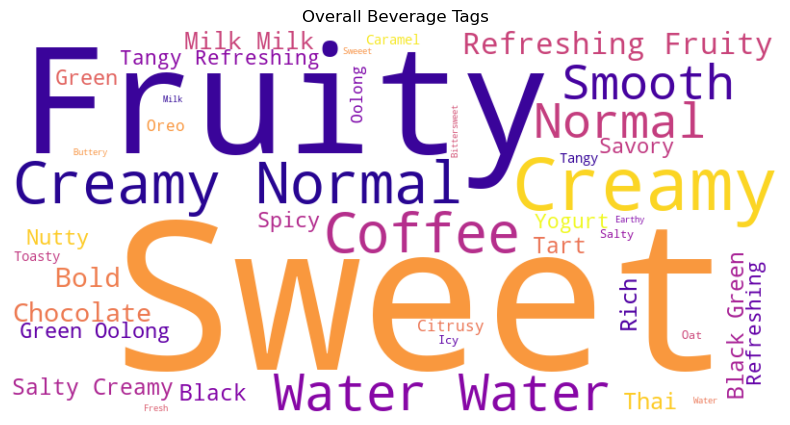

In [21]:
# Base Type & Flavor Tags word cloud
drink_summary = dataset.groupby('menu').agg({
    'base type': lambda x: ', '.join(x.unique()),
    'flavor tags': lambda x: ', '.join(x.dropna().unique())}).reset_index()

drink_summary 

all_tags = (dataset['base type'].dropna().str.cat(sep=', ') + ', ' +
            dataset['flavor tags'].dropna().str.cat(sep=', '))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_tags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Beverage Tags')
plt.show()